Name: Priya Kulkarni

UTA ID : 1002088875

DAA final project with research paper


In [ ]:
import time
import random
import matplotlib.pyplot as plt

class BTreeNode:
    def __init__(self, leaf=True):
        self.leaf = leaf
        self.keys = []
        self.child = []


class BTree:
    def __init__(self, t):
        self.root = BTreeNode()
        self.t = t

    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self._split_child(temp, 0)
            self._insert_non_full(temp, k)
        else:
            self._insert_non_full(root, k)

    def _insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k[0] < x.keys[i][0]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k[0] < x.keys[i][0]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self._split_child(x, i)
                if k[0] > x.keys[i][0]:
                    i += 1
            self._insert_non_full(x.child[i], k)

    def _split_child(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(leaf=y.leaf)

        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])

        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]

        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

    def search(self, k, x=None):
        if isinstance(x, BTreeNode):
            i = 0
            while i < len(x.keys) and k > x.keys[i][0]:
                i += 1
            if i < len(x.keys) and k == x.keys[i][0]:
                return x, i
            elif x.leaf:
                return None
            else:
                return self.search(k, x.child[i])
        else:
            return self.search(k, self.root)

    def delete(self, k):
        root = self.root
        self._delete(root, k)

    def _delete(self, x, k):
        if x is None:
            return None

        i = 0
        while i < len(x.keys) and k > x.keys[i][0]:
            i += 1

        if i < len(x.keys) and k == x.keys[i][0]:
            if x.leaf:
                del x.keys[i]
            else:
                if len(x.child[i].keys) >= self.t:
                    predecessor = self._get_predecessor(x, i)
                    x.keys[i] = predecessor
                    self._delete(x.child[i], predecessor[0])
                elif len(x.child[i + 1].keys) >= self.t:
                    successor = self._get_successor(x, i)
                    x.keys[i] = successor
                    self._delete(x.child[i + 1], successor[0])
                else:
                    self._merge(x, i)
                    self._delete(x.child[i], k)
        else:
            if x.leaf:
                return None
            elif len(x.child[i].keys) >= self.t:
                self._delete(x.child[i], k)
            else:
                if i > 0 and len(x.child[i - 1].keys) >= self.t:
                    self._borrow_from_prev(x, i)
                elif i < len(x.keys) and len(x.child[i + 1].keys) >= self.t:
                    self._borrow_from_next(x, i)
                else:
                    if i < len(x.keys):
                        self._merge(x, i)
                    else:
                        self._merge(x, i - 1)
                self._delete(x.child[i], k)
    def get_space_complexity(self):
        return self._get_space_complexity(self.root)

    def _get_space_complexity(self, x):
        if x is None:
            return 0
        count = 1
        for child in x.child:
            count += self._get_space_complexity(child)
        return count


class TStarNode:
    def __init__(self, t):
        self.keys = []
        self.children = []
        self.t = t

    def is_leaf(self):
        return len(self.children) == 0

class TStarTree:
    def __init__(self, t):
        self.root = TStarNode(t)
        self.t = t

    def search(self, k, x=None):
        if x is None:
            x = self.root
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if i < len(x.keys) and k == x.keys[i]:
            return x, i
        if x.is_leaf():
            return None
        else:
            return self.search(k, x.children[i])

    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = TStarNode(self.t)
            self.root = temp
            temp.children.append(root)
            self._split_child(temp, 0)
            self._insert_non_full(temp, k)
        else:
            self._insert_non_full(root, k)

    def _insert_non_full(self, x, k):
      i = len(x.keys) - 1
      if x.is_leaf():
        x.keys.append(None)
        while i >= 0 and k < x.keys[i]:
            x.keys[i + 1] = x.keys[i]
            i -= 1
        x.keys[i + 1] = k
      else:
        while i >= 0 and k < x.keys[i]:
            i -= 1
        i += 1
        if i < len(x.children):
            if len(x.children[i].keys) == (2 * self.t) - 1:
                self._split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self._insert_non_full(x.children[i], k)
        else:
            # If i exceeds the number of children, create a new child node
            new_child = TStarNode(self.t)
            x.children.append(new_child)
            self._insert_non_full(new_child, k)




    def _split_child(self, x, i):
      t = self.t
      y = x.children[i]
      z = TStarNode(t)

      x.children.insert(i + 1, z)
      x.keys.insert(i, y.keys[t - 1])

      z.keys = y.keys[t: (2 * t) - 1]
      y.keys = y.keys[0: t - 1]

      if not y.is_leaf():
        z.children = y.children[t: 2 * t]
        y.children = y.children[0: t]
    def delete(self, k):
        root = self.root
        if len(root.keys) == 0:
            return
        self._delete(root, k)

    def _delete(self, x, k):
        if x.is_leaf():
            if k in x.keys:
                x.keys.remove(k)
            return
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if i < len(x.keys) and k == x.keys[i]:
            self._delete_internal(x, i, k)
        elif i < len(x.keys):
            self._delete(x.children[i], k)
        else:
            self._delete(x.children[-1], k)

    def _delete_internal(self, x, i, k):
        if x.children[i].is_leaf():
            x.keys[i] = x.children[i].keys[-1]
            x.children[i].keys.pop(-1)
        else:
            if len(x.children[i].keys) >= self.t:
                x.keys[i] = x.children[i].keys[-1]
                self._delete(x.children[i], x.keys[i])
            elif len(x.children[i + 1].keys) >= self.t:
                x.keys[i] = x.children[i + 1].keys[0]
                self._delete(x.children[i + 1], x.keys[i])
            else:
                merged_node = self._merge_nodes(x.children[i], x.children[i + 1])
                self._delete(merged_node, k)

    def _merge_nodes(self, left_child, right_child):
        merged_node = TStarNode(self.t)
        merged_node.keys = left_child.keys + [right_child.keys[0]]
        merged_node.children = left_child.children + right_child.children
        return merged_node
    def get_space_complexity(self):
        return self._count_keys(self.root)

    def _count_keys(self, node):
        if node is None:
            return 0
        count = len(node.keys)
        for child in node.children:
            count += self._count_keys(child)
        return count

def generate_random_data(size):
    return [(random.randint(1, 1000), f"Data-{i}") for i in range(size)]

def benchmark_insertion(btree, tstartree, data):
    btree_time = []
    tstartree_time = []
    for key, value in data:
        start = time.time()
        btree.insert((key, value))
        btree_time.append(time.time() - start)

        start = time.time()
        tstartree.insert(key)
        tstartree_time.append(time.time() - start)

    return btree_time, tstartree_time

def benchmark_search(btree, tstartree, keys):
    btree_time = []
    tstartree_time = []
    for key in keys:
        start = time.time()
        btree.search(key)
        btree_time.append(time.time() - start)

        start = time.time()
        tstartree.search(key)
        tstartree_time.append(time.time() - start)

    return btree_time, tstartree_time

def plot_results(btree_times, tstartree_times, operation):
    plt.plot(btree_times, label='B-tree')
    plt.plot(tstartree_times, label='T*-tree')
    plt.xlabel('Operation')
    plt.ylabel('Time (seconds)')
    plt.title(f'{operation} Performance Comparison')
    plt.legend()
    plt.show()
def benchmark_deletion(btree, tstartree, delete_keys):
    btree_time = []
    tstartree_time = []
    for key in delete_keys:
        # Benchmark deletion operation for B-tree
        start = time.time()
        btree.delete(key)
        btree_time.append(time.time() - start)

        # Benchmark deletion operation for T*-tree
        start = time.time()
        tstartree.delete(key)
        tstartree_time.append(time.time() - start)

    return btree_time, tstartree_time
# Main code
btree = BTree(t=3)  # Adjust t value for desired B-tree order
tstartree = TStarTree(t=3)  #


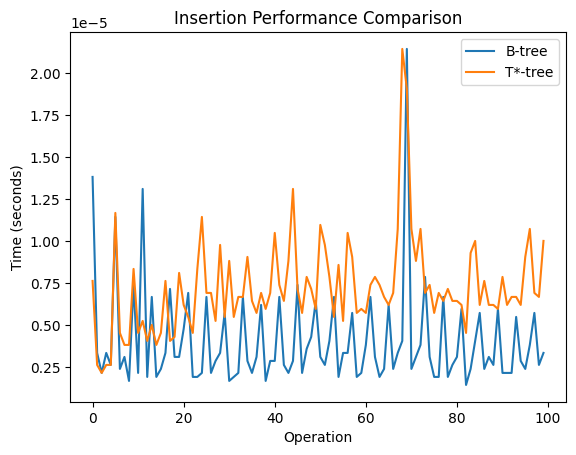

In [ ]:
# Generate random data for insertion
data_size = 100 # Example data size
data = generate_random_data(data_size)

# Benchmark insertion operation
btree_insertion_times, tstartree_insertion_times = benchmark_insertion(btree, tstartree, data)

# Plotting insertion performance comparison
plot_results(btree_insertion_times, tstartree_insertion_times, 'Insertion')


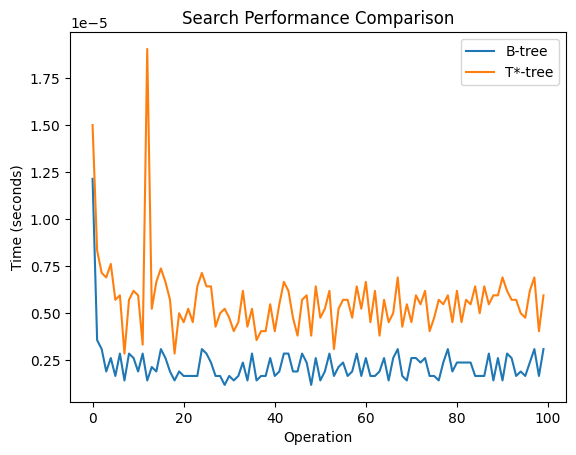

In [ ]:
# Benchmark search operation
search_keys = [random.randint(1, 1000) for _ in range(100)]  # Example search keys

btree_search_times, tstartree_search_times = benchmark_search(btree, tstartree, search_keys)

# Plotting search performance comparison
plot_results(btree_search_times, tstartree_search_times, 'Search')


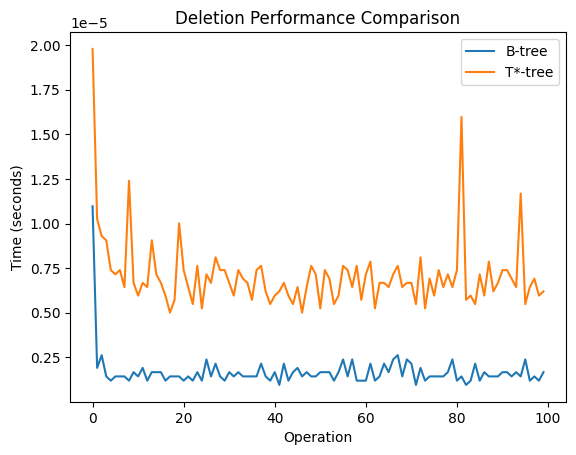

In [ ]:
# Generate random keys for deletion
delete_keys = [random.choice(range(1, 1001)) for _ in range(100)]

# Benchmark deletion operation
btree_deletion_times, tstartree_deletion_times = benchmark_deletion(btree, tstartree, delete_keys)

# Plotting deletion performance comparison
plot_results(btree_deletion_times, tstartree_deletion_times, 'Deletion')


In [ ]:
def benchmark_space_complexity(btree, tstartree, data):
    btree_space = []
    tstartree_space = []

    for key, value in data:
        # Insert data into B-tree
        btree.insert((key, value))
        # Measure number of nodes/keys in B-tree
        btree_space.append(btree.get_space_complexity())

        # Insert data into T*-tree
        tstartree.insert(key)
        # Measure number of nodes/keys in T*-tree
        tstartree_space.append(tstartree.get_space_complexity())

    return btree_space, tstartree_space


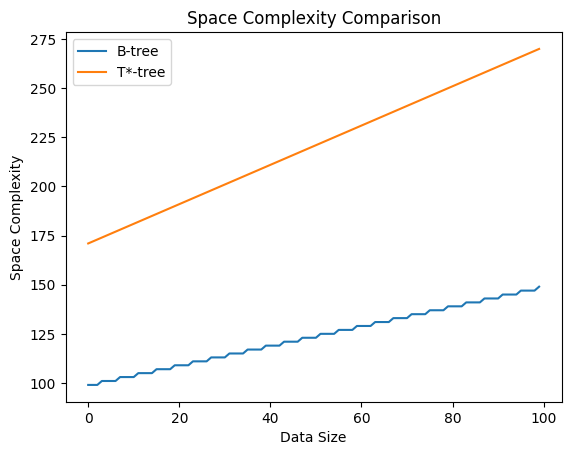

In [ ]:
# Generate random data for insertion
data_size = 100  # Example data size
data = generate_random_data(data_size)

# Benchmark space complexity
btree_space, tstartree_space = benchmark_space_complexity(btree, tstartree, data)

# Plotting space complexity comparison
plt.plot(btree_space, label='B-tree')
plt.plot(tstartree_space, label='T*-tree')
plt.xlabel('Data Size')
plt.ylabel('Space Complexity')
plt.title('Space Complexity Comparison')
plt.legend()
plt.show()
